In [1]:
import ares
import numpy as np
import matplotlib.pyplot as pl
import distpy

My first try at fitting

In [2]:
# Independent variables
redshifts = np.array([3, 3.8, 4, 4.9, 5, 5.9, 6, 6.9, 7, 7.9, 8])
MUV = np.arange(-28, -8.8, 0.2)
# Mh = np.logspace(7, 13, 61)

# blob 1: the LF. Give it a name, and the function needed to calculate it.
blob_n1 = ['galaxy_lf']
blob_i1 = [('z', redshifts), ('x', MUV)]
blob_f1 = ['LuminosityFunction']

In [3]:
blob_pars = \
{
 'blob_names': [blob_n1],
 'blob_ivars': [blob_i1],
 'blob_funcs': [blob_f1],
 'blob_kwargs': [None],
}

In [15]:
#define the parameters that remain unchanged
base_pars = ares.util.ParameterBundle('emma:model1')
base_pars.update(blob_pars)

# This is important!
base_pars['pop_calib_lum'] = None

In [16]:
free_pars = \
  [
   'pq_func_par0[4]', #this is the constant
   'pq_func_par1[4]', #offset
   'pq_func_par2[4]', #slope
  ]

is_log = [False]#, False, False]

from distpy.distribution import UniformDistribution
from distpy.distribution import DistributionSet

ps = DistributionSet()
# ps.add_distribution(UniformDistribution(1e-8, 5e-1), 'pq_func_par0[4]')
# ps.add_distribution(UniformDistribution(0, 5e-1),  'pq_func_par1[4]')
# ps.add_distribution(UniformDistribution(0, 5e-1),   'pq_func_par2[4]')

ps.add_distribution(UniformDistribution(0, 1), 'pq_func_par0[4]')
ps.add_distribution(UniformDistribution(0, 1),  'pq_func_par1[4]')
ps.add_distribution(UniformDistribution(0, 1),   'pq_func_par2[4]')

In [17]:
guesses = \
{
 'pq_func_par0[4]': 3e-4,
 'pq_func_par1[4]': 0,
 'pq_func_par2[4]': 0,
}


In [18]:
# Initialize a fitter object and give it the data to be fit
fitter_lf = ares.inference.FitGalaxyPopulation(**base_pars)

# The data can also be provided more explicitly
#I seem to need this or else the run throws error: Must set data by hand! 
# fitter_lf.redshifts = {‘lf’: [5.9]}
fitter_lf.data = 'bouwens2015', 'bouwens2017'

# print(fitter_lf.data)

In [19]:
fitter = ares.inference.ModelFit(**base_pars)
fitter.add_fitter(fitter_lf)

# Establish the object to which we'll pass parameters
from ares.populations.GalaxyHOD import GalaxyHOD
fitter.simulator = GalaxyHOD

In [20]:
fitter.save_hmf = True  # cache HMF for a speed-up!
fitter.save_psm = True  # cache source SED model (e.g., BPASS, S99)

# Setting this flag to False will make ARES generate new files for each checkpoint.
# 2-D blobs can get large, so this allows us to just download a single
# snapshot or two if we'd like (useful if running on remote machine)
fitter.checkpoint_append = False

fitter.parameters = free_pars
# fitter.is_log = is_log
fitter.prior_set = ps

# In general, the more the merrier (~hundreds)
fitter.nwalkers = 200

fitter.jitter = [0.01] * len(fitter.parameters)
fitter.guesses = guesses

# Fixing position of walker 0 (parameter pq_func_par0[4])
# Moved from -0.008986972757721787 to 0.016834811148655718
# Fixing position of walker 1 (parameter pq_func_par0[4])
# Moved from -0.005852061331522855 to 0.0233659787253035
# Fixing position of walker 3 (parameter pq_func_par0[4])
# Moved from -0.020785722061983 to 0.002382852673193973
# Fixing position of walker 6 (parameter pq_func_par0[4])
# Moved from -0.004727728669565599 to 0.005566882734661435
# Fixing position of walker 8 (parameter pq_func_par0[4])
# Moved from -0.00018163958148467295 to 0.0025169955293304256
# Fixing position of walker 9 (parameter pq_func_par0[4])
# Moved from -0.0043158695643689985 to 0.0010771524901604399
# Fixing position of walker 10 (parameter pq_func_par0[4])
# Moved from -0.0001644807005660944 to 0.0003375424381965574
# Fixing position of walker 14 (parameter pq_func_par0[4])
# Moved from -0.00297387271692507 to 0.00924757331117606
# Fixing position of walker 16 (parameter pq_func_par0[4])
# M

In [ ]:
# Run the thing
fitter.run('test_lfcal', burn=5, steps=25, save_freq=4, clobber=True)

Saved HaloMassFunction instance to limit I/O.
# Starting burn-in: Tue Jun 23 16:26:49 2020
# Wrote test_lfcal.burn.dd0000.facc.pkl: Tue Jun 23 16:30:05 2020
Writing data one last time because save_freq > steps.
# Wrote test_lfcal.burn.dd0001.facc.pkl: Tue Jun 23 16:30:38 2020
# Burn-in complete in 229 seconds.
# Fixing position of walker 0 (parameter pq_func_par0[4])
# Moved from -0.00015605042817647894 to 0.004482703790616965
# Fixing position of walker 2 (parameter pq_func_par0[4])
# Moved from -0.006637779218725997 to 0.004961035622328134
# Fixing position of walker 3 (parameter pq_func_par0[4])
# Moved from -0.00501844931479326 to 0.0018371031582271773
# Fixing position of walker 5 (parameter pq_func_par0[4])
# Moved from -0.012463839630039103 to 0.004482703790616965
# Fixing position of walker 6 (parameter pq_func_par0[4])
# Moved from -0.0022795888340481946 to 0.0060489648933385876
# Fixing position of walker 7 (parameter pq_func_par0[4])
# Moved from -0.017102369825659762 to 0.0

In [46]:
anl = ares.analysis.ModelSet('test_lfcal')

labels = {
    'pq_func_par0[4]': r'const', #this is the constant
   'pq_func_par1[4]': 'offset',
   'pq_func_par2[4]': 'slope'
}

anl.custom_labels = labels
# anl.custom_labels


##############################################################################################################
####                                         Analysis: Model Set                                          ####
##############################################################################################################
#### ---------------------------------------------------------------------------------------------------- ####
#### Basic Information                                                                                    ####
#### ---------------------------------------------------------------------------------------------------- ####
#### path        : ./                                                                                     ####
#### prefix      : test_lfcal                                                                             ####
#### N-d         : 3                                                                                      ####


{'pq_func_par0[4]': 'const',
 'pq_func_par1[4]': 'offset',
 'pq_func_par2[4]': 'slope'}

UnboundLocalError: local variable '_chain' referenced before assignment

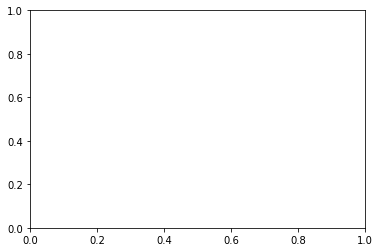

In [47]:
gpop = ares.analysis.GalaxyPopulation()

ax = anl.ReconstructedFunction('galaxy_lf', ivar=[6, None], samples='all', color='b', alpha=0.01)

# Plot any data within dz=0.1 of z=6
gpop.PlotLF(6, ax=ax, round_z=0.2)
ax.set_title("z = 6")

ax.set_ylim(1e-9, 1)
ax.legend()
pl.show()

# Loading test_lfcal.dd*.chain.pkl...
# Loaded test_lfcal.dd*.chain.pkl in 0.21 s.
0 of 20000 chain elements ignored because of chain links with inf's/nan's.


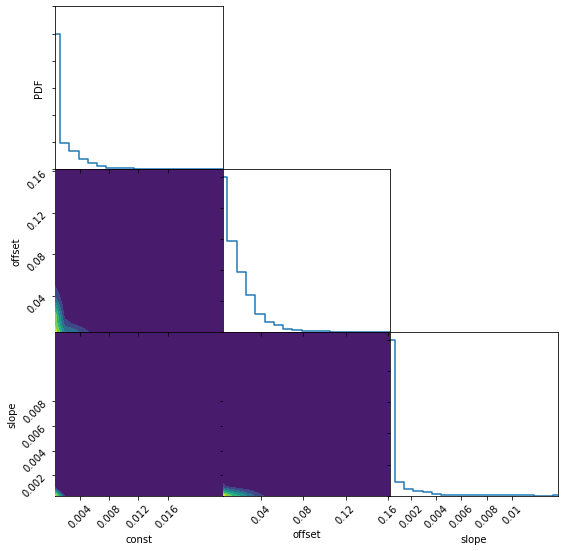

In [32]:
z = 6
# free_pars

ax = anl.TrianglePlot(pars=free_pars, ivar=[z, None, None])
# anl.set_axis_labels(pars=free_pars, ax=ax)
# anl.TrianglePlot(pars='pq_func_par0[4]', ivar=z)

#, label_panels=free_pars)

# (pars=params, ivar=[z, None, None, None, None, None, None, None], \
#                  label_panels=params

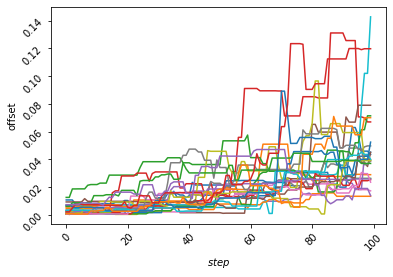

In [33]:
anl.WalkerTrajectories('pq_func_par1[4]', N=25)

['pq_func_par0[4]', 'pq_func_par1[4]', 'pq_func_par2[4]']


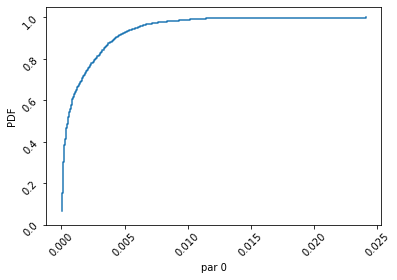

In [13]:
print(free_pars)

# p = anl.PosteriorPDF(free_pars)
# print(p)

anl.PosteriorCDF('pq_func_par0[4]')


In [9]:
covar = anl.CovarianceMatrix(free_pars)

if len(covar[0]) == 1:
    print("{}: {}".format(free_pars[0], covar[0][0]))
else:
    for i in range(len(covar[0])):
        print("{}: {:e}".format(free_pars[i], covar[0][i]))
        
fit_mean = np.array(covar[0])

# Loading test_lfcal.dd*.chain.pkl...
# Loaded test_lfcal.dd*.chain.pkl in 0.2 s.
pq_func_par0[4]: 1.521171e-03
pq_func_par1[4]: 1.774935e-02
pq_func_par2[4]: 5.696704e-04


In [10]:
pars_ch = {}
for i in range(len(covar[0])):
    pars_ch[free_pars[i]] = covar[0][i]
    
pars_mean = ares.util.ParameterBundle("emma:model1")

pars_mean.update(pars_ch)
# print(pars_best)
pop_mean = ares.populations.GalaxyPopulation(**pars_mean)

In [11]:
fit_best_like = anl.max_likelihood_parameters()

for i in range(len(covar[0])):
    print(anl.get_1d_error(free_pars[i])) #(maximum likelihood value, positive error, negative error).

# print(fit_best_like)

(2.6528943124085394e-07, array([ 0.003287  , -0.00010237]))
(0.05780796848739077, array([-0.02685048,  0.05382403]))
(6.577526328725272e-05, array([8.26177272e-04, 2.88986095e-05]))


In [12]:
pars_best = ares.util.ParameterBundle("emma:model1")

pars_best.update(fit_best_like)
# print(pars_best)
pop_best = ares.populations.GalaxyPopulation(**pars_best)


# WARNING: finkelstein2015 wavelength=1500.0A, not 1600.0A!
# WARNING: weisz2014 wavelength=1700.0A, not 1600.0A!
# WARNING: vanderburg2010 wavelength=1500.0A, not 1600.0A!


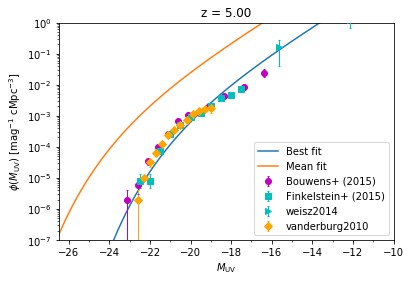

In [29]:
z = 5

ls_best = pop_best.LuminosityFunction(z, MUV)
ls_mean = pop_mean.LuminosityFunction(z, MUV)

obslf = ares.analysis.GalaxyPopulation()
obslf.Plot(z=z, round_z=0.2)

pl.semilogy(MUV, ls_best, label='Best fit')
pl.semilogy(MUV, ls_mean, label='Mean fit')
pl.title("z = %.2f" %z)
pl.legend()
pl.show()